In [1]:
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.model_selection import train_test_split
rcParams['figure.figsize']=20,10
import seaborn as sns

## Unsupervised Feature Selection

In [2]:
# unsupervised feature selection

# Principal Feature Analysis (PFA)
# http://venom.cs.utsa.edu/dmz/techrep/2007/CS-TR-2007-011.pdf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X)
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

## Categorical data processing

In [3]:
# CATEGORICAL DATA
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

## Data Preprocessing

## Data Visualization

1. Raisin Dataset

Downsampling to the anomaly ratio of 5%.

In [2]:
# %%load data
raisin = pd.read_csv("../content/drive/MyDrive/data/Raisin_Dataset.csv")

In [3]:
raisin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    float64
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    float64
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(7), object(1)
memory usage: 56.4+ KB


In [4]:
# downsampling_raisin
cls1 = raisin[0:450]
cls2 = raisin[451:900]

# %%
n_sample = 25
cls2 = shuffle(cls2)
cls2 = cls2[0:n_sample]
imbalanced_raisin = pd.concat([cls1, cls2], axis=0)

imbalanced_raisin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 761
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             475 non-null    float64
 1   MajorAxisLength  475 non-null    float64
 2   MinorAxisLength  475 non-null    float64
 3   Eccentricity     475 non-null    float64
 4   ConvexArea       475 non-null    float64
 5   Extent           475 non-null    float64
 6   Perimeter        475 non-null    float64
 7   Class            475 non-null    object 
dtypes: float64(7), object(1)
memory usage: 33.4+ KB


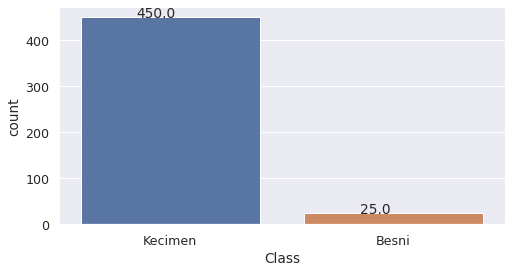

In [9]:
plt.figure(figsize=(8,4))

ax=sns.countplot(x="Class",data=imbalanced_raisin)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title = 'Raisin Anomaly'
plt.show()

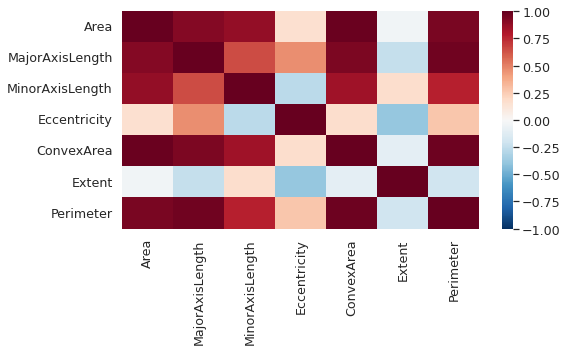

In [10]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    imbalanced_raisin.corr(),        
    cmap='RdBu_r', 
    #annot=True, 
    vmin=-1, vmax=1);

In [16]:
imbalanced_raisin[imbalanced_raisin.columns[:-1]]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251
...,...,...,...,...,...,...,...
604,102013.0,453.893458,292.130181,0.765354,106036.0,0.637828,1266.255
514,166275.0,602.307775,356.236287,0.806340,168292.0,0.719282,1580.961
759,132116.0,519.679984,325.332488,0.779803,133811.0,0.745071,1393.335
737,48007.0,302.611047,209.116084,0.722817,50679.0,0.677051,889.743


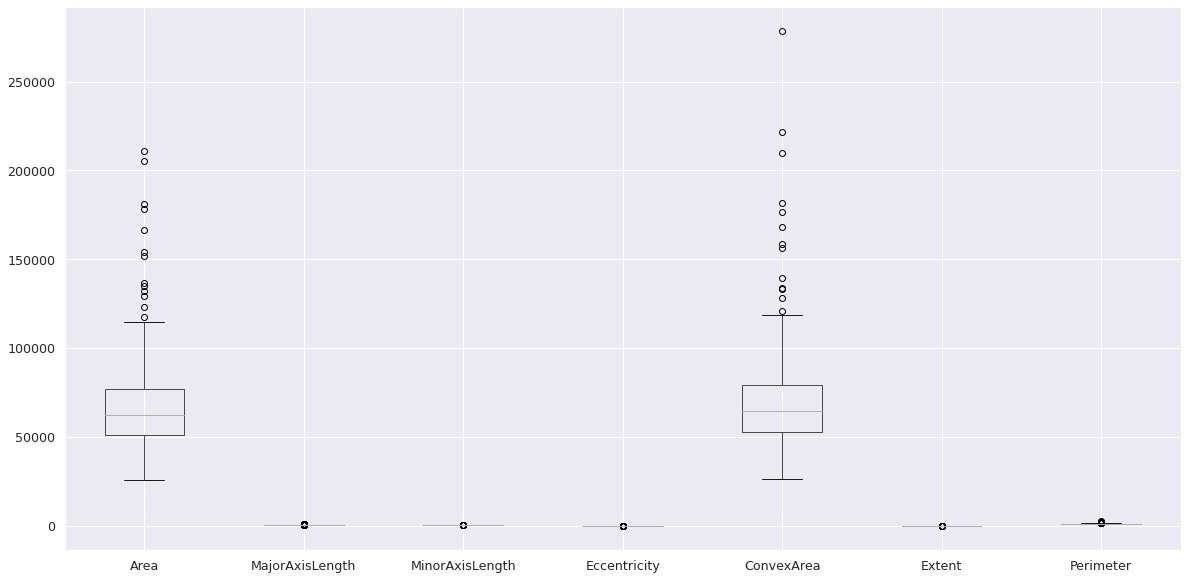

In [17]:
boxplot = imbalanced_raisin[imbalanced_raisin.columns[:-1]].boxplot()


2. Electronic Grid Stability

Downsampling to the anomaly ratio of 5%

In [18]:
n_sample=336
electrical_grid=pd.read_csv("../content/drive/MyDrive/data/Electrical_Grid_Stability.csv")
e_grid=electrical_grid.drop("stab",axis=1)

In [19]:
e_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


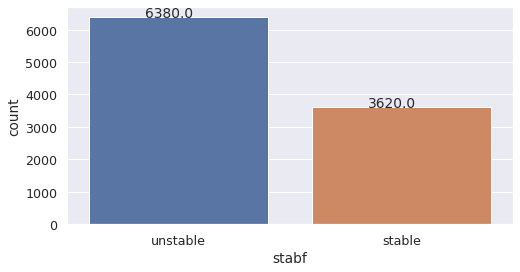

In [21]:
plt.figure(figsize=(8,4))

ax=sns.countplot(x="stabf",data=e_grid)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title = 'Electrical Grid Stability Anomaly'
plt.show()

In [22]:
# downsampling
kv={"unstable":0,"stable":1}
# pfa based feature selection
#e_grid= electrical_grid.iloc[:,[4, 8, 2, 3, 5, 6,13]]
#e_grid= electrical_grid.iloc[:,[4, 5, 6,13]]
e_grid.loc[:,"stabf"]=list(e_grid["stabf"].map(lambda x:kv[x]).values)
e_grid=e_grid.sort_values(by="stabf")
e_grid.index=pd.Series(range(10000))

cls1=e_grid[0:6380]
cls2=e_grid[6380:10000]
cls2=shuffle(cls2)
cls2=cls2[0:n_sample]
imbalanced_grid=pd.concat([cls1,cls2],axis=0)

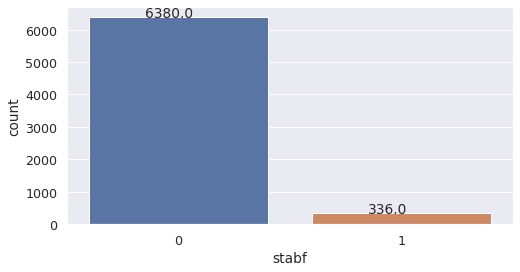

In [23]:
plt.figure(figsize=(8,4))

ax=sns.countplot(x="stabf",data=imbalanced_grid)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title = 'Electrical Grid Stability Anomaly'
plt.show()

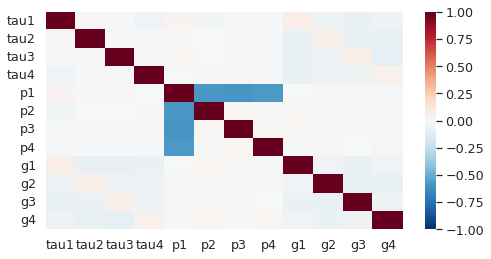

In [24]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    imbalanced_grid.iloc[:,0:-1].corr(),        
    cmap='RdBu_r', 
    #annot=True, 
    vmin=-1, vmax=1);

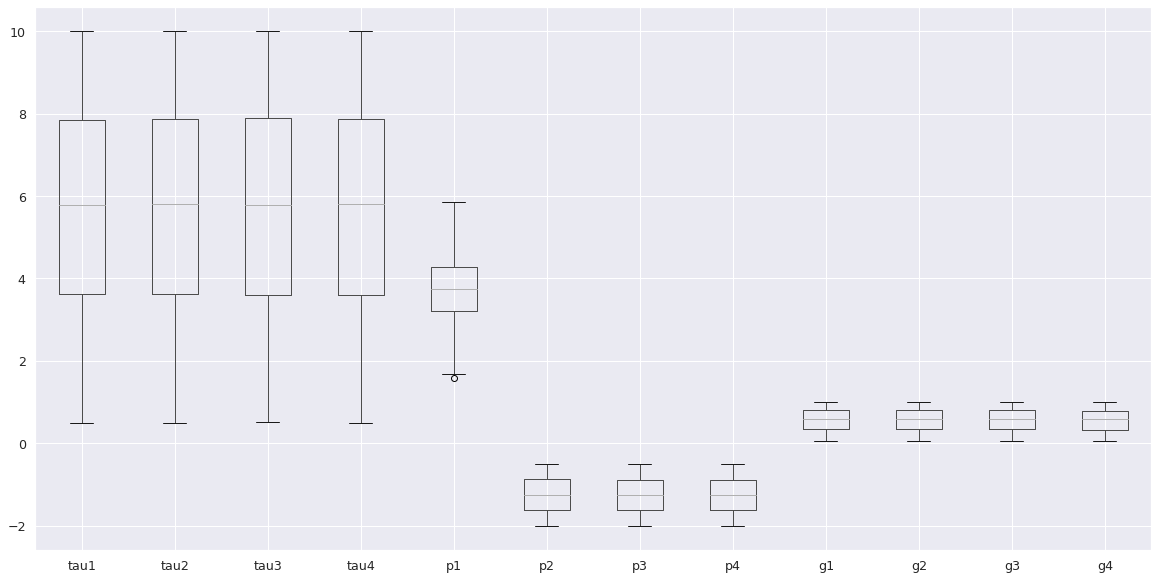

In [25]:
boxplot = imbalanced_grid.iloc[:,0:-1].boxplot()

3. Activitiy Recognition

First read file and write file based on the description.

room =1 or 2, sex = 1 for M, 2 for F 

In [4]:
read_file = pd.read_csv ('../content/drive/MyDrive/data/Datasets_Healthy_Older_People/S1_Dataset/d1p02M',header = None)
read_file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       260 non-null    float64
 1   1       260 non-null    float64
 2   2       260 non-null    float64
 3   3       260 non-null    float64
 4   4       260 non-null    int64  
 5   5       260 non-null    float64
 6   6       260 non-null    float64
 7   7       260 non-null    float64
 8   8       260 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 18.4 KB


In [5]:
path_head="../content/drive/MyDrive/data/Datasets_Healthy_Older_People/S1_Dataset/d1p"

for i in range(1,61):
    if i<10:
        path=path_head+'0'+str(i)
        
    else:
        path=path_head+str(i)
        
    if  i<8 or 35<i<49:
        path=path+'M'
        
        data0 =pd.read_csv(path,header=None)
        
        data0["Sex"] = "M"
    else:
        path=path+'F'
        data0 =pd.read_csv(path,header=None)
        
        data0["Sex"] = "F"
    data0['Room'] = 'R1'
    if i==1:
        data=data0
    else:
        data=pd.concat([data, data0],ignore_index=True)
        
s1_dataset=data


In [50]:
s1_dataset

,0,1,2,3,4,5,6,7,8,Sex,Room
0,0.00,0.272030,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,M,1
1,0.50,0.272030,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,M,1
2,1.50,0.447910,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,M,1
3,1.75,0.447910,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,M,1
4,2.50,0.342380,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,M,1
...,...,...,...,...,...,...,...,...,...,...,...
52477,485.00,0.330660,0.95081,-0.230340,1,-57.0,6.2188,921.75,1,F,1
52478,485.08,0.330660,0.95081,-0.230340,3,-58.0,0.8805,921.75,1,F,1
52479,485.50,0.330660,0.95081,-0.230340,1,-60.5,5.0054,924.75,1,F,1
52480,488.25,0.119600,0.82449,0.009122,4,-56.0,4.9087,925.75,4,F,1


In [6]:
path_head="../content/drive/MyDrive/data/Datasets_Healthy_Older_People/S2_Dataset/d2p"

for i in range(1,28):
    if i<10:
        path=path_head+'0'+str(i)
        
    else:
        path=path_head+str(i)
        
    if  17<i<23:
        path=path+'M'
        
        data0 =pd.read_csv(path,header=None)
        
        data0["Sex"] = "M"
    else:
        path=path+'F'
        data0 =pd.read_csv(path,header=None)
        
        data0["Sex"] = "F"
    
    data0['Room'] = 'R2'
    if i==1:
        data=data0
    else:
        data=pd.concat([data, data0],ignore_index=True)
        
s2_dataset=data

In [52]:
s2_dataset

,0,1,2,3,4,5,6,7,8,Sex,Room
0,0.00,-0.232160,0.215880,-1.188200,2,-48.5,2.74430,920.75,3,F,2
1,0.25,-0.056282,0.043636,-1.142600,2,-50.0,2.36540,921.75,3,F,2
2,0.50,0.143050,0.296270,-1.336400,3,-59.5,0.20709,922.25,3,F,2
3,0.75,0.318930,0.284780,-0.925930,2,-51.0,0.41571,923.25,3,F,2
4,1.05,0.412730,0.135500,-1.028600,2,-44.5,4.45470,920.25,3,F,2
...,...,...,...,...,...,...,...,...,...,...,...
22641,444.00,0.905200,0.640760,-0.082102,1,-59.5,1.95740,922.25,2,F,2
22642,449.00,0.905200,0.640760,-0.082102,1,-59.0,6.25400,922.25,2,F,2
22643,451.50,0.424460,0.916360,-0.161920,1,-53.0,5.71560,922.25,4,F,2
22644,451.58,0.424460,0.916360,-0.161920,1,-52.0,5.89820,922.25,4,F,2


In [7]:
sensor = pd.concat([s1_dataset, s2_dataset],ignore_index=True)


In [13]:
sensor['loca']=sensor[1]*sensor[1]+sensor[2]*sensor[2]+sensor[3]*sensor[3]

In [54]:
sensor.columns = ['T_s','Frontal_axis','Vertical_axis','Lateral_axis','AntennaID','RSSI','Phase','Frequency','Activity','Room', 'Sex']
#header=[]

In [14]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75128 entries, 0 to 75127
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       75128 non-null  float64
 1   1       75128 non-null  float64
 2   2       75128 non-null  float64
 3   3       75128 non-null  float64
 4   4       75128 non-null  int64  
 5   5       75128 non-null  float64
 6   6       75128 non-null  float64
 7   7       75128 non-null  float64
 8   8       75128 non-null  int64  
 9   Sex     75128 non-null  object 
 10  Room    75128 non-null  object 
 11  loca    75128 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 6.9+ MB


In [15]:
#sensor_org['AntennaID']=sensor_org['AntennaID'].astype(str)
kv = {1: "A1", 2: "A2", 3: "A3", 4: "A4"}
sensor[4] = sensor[4].map(lambda x: kv[x])

In [16]:
sensor.to_csv('../content/drive/MyDrive/data/activity_recognition.csv', index=False , header = ['T_s','Frontal_axis','Vertical_axis','Lateral_axis','AntennaID','RSSI','Phase','Frequency','Activity','Sex', 'Room','loc']
                  )

In [17]:
sensor_org = pd.read_csv ('../content/drive/MyDrive/data/activity_recognition.csv')
sensor_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75128 entries, 0 to 75127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_s            75128 non-null  float64
 1   Frontal_axis   75128 non-null  float64
 2   Vertical_axis  75128 non-null  float64
 3   Lateral_axis   75128 non-null  float64
 4   AntennaID      75128 non-null  object 
 5   RSSI           75128 non-null  float64
 6   Phase          75128 non-null  float64
 7   Frequency      75128 non-null  float64
 8   Activity       75128 non-null  int64  
 9   Sex            75128 non-null  object 
 10  Room           75128 non-null  object 
 11  loc            75128 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 6.9+ MB


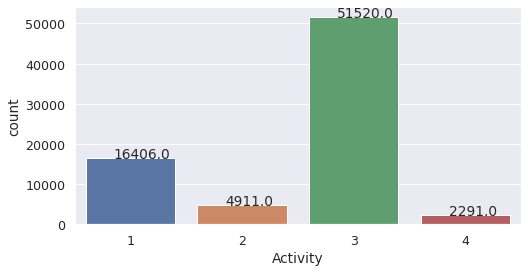

In [110]:
plt.figure(figsize=(8,4))

ax=sns.countplot(x="Activity",data=sensor_org)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title = 'Activity Recognition'
plt.show()

In [112]:
list_drop = ['Activity']
sensor_org.drop(list_drop,axis=1,inplace=True)

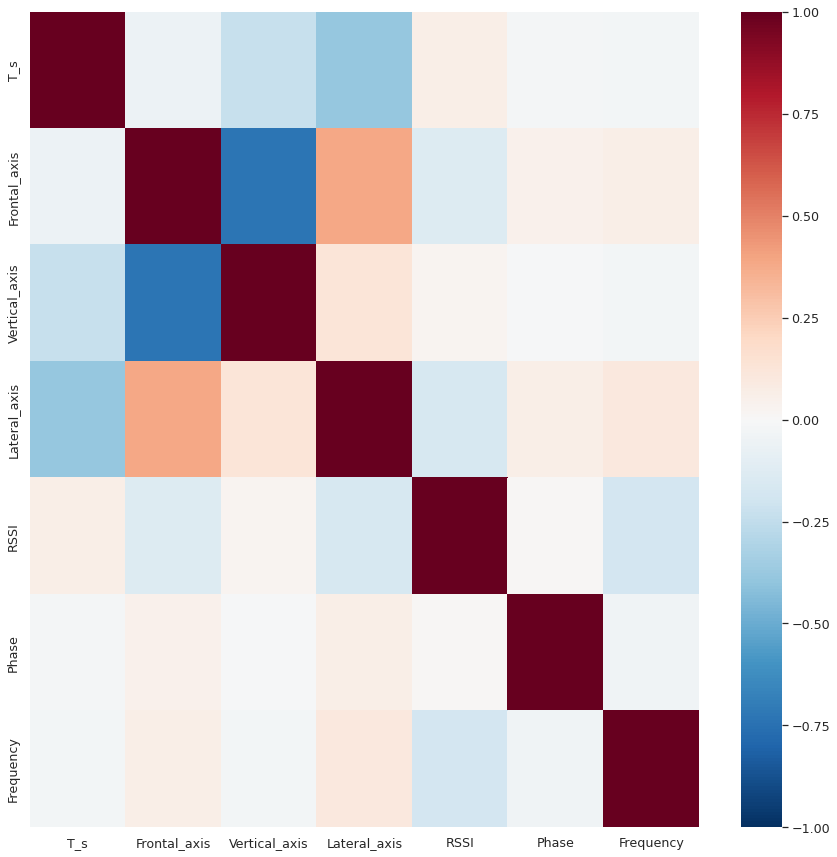

In [113]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,15))
sns.heatmap(
    sensor_org.corr(),        
    cmap='RdBu_r', 
    vmin=-1, vmax=1);

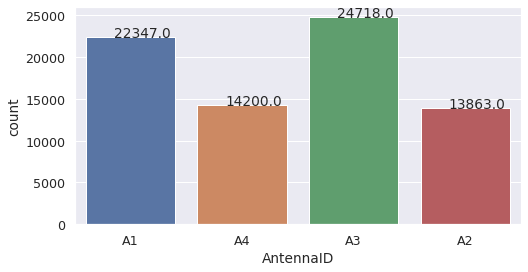

In [114]:
plt.figure(figsize=(8,4))

ax=sns.countplot(x="AntennaID",data=sensor_org)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title = 'sensor antenna'
plt.show()

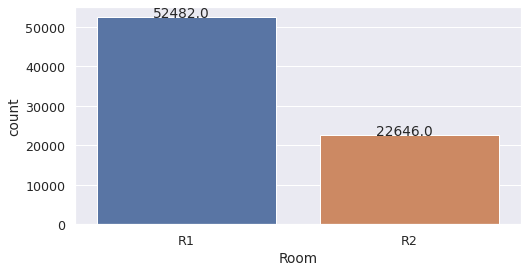

In [115]:
plt.figure(figsize=(8,4))

ax=sns.countplot(x="Room",data=sensor_org)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title = 'sensor room'
plt.show()

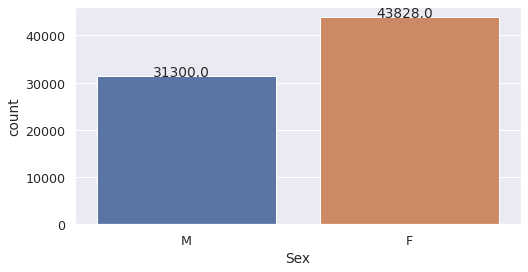

In [116]:
plt.figure(figsize=(8,4))

ax=sns.countplot(x="Sex",data=sensor_org)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title = 'sensor sex'
plt.show()

In [132]:
# categorical activity recognition data
sensor_org = pd.read_csv ('../content/drive/MyDrive/data/activity_recognition_cat.csv')
sensor_org.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75128 entries, 0 to 75127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_s            75128 non-null  float64
 1   Frontal_axis   75128 non-null  float64
 2   Vertical_axis  75128 non-null  float64
 3   Lateral_axis   75128 non-null  float64
 4   RSSI           75128 non-null  float64
 5   Phase          75128 non-null  float64
 6   Frequency      75128 non-null  float64
 7   AntennaID_A1   75128 non-null  int64  
 8   AntennaID_A2   75128 non-null  int64  
 9   AntennaID_A3   75128 non-null  int64  
 10  AntennaID_A4   75128 non-null  int64  
 11  Room_R1        75128 non-null  int64  
 12  Room_R2        75128 non-null  int64  
 13  Sex_F          75128 non-null  int64  
 14  Sex_M          75128 non-null  int64  
dtypes: float64(7), int64(8)
memory usage: 8.6 MB


In [139]:
sensor_org['AntennaID'] = sensor_org['AntennaID'].astype('category')
sensor_org['Room'] = sensor_org['Room'].astype('category')     
sensor_org['Sex'] = sensor_org['Sex'].astype('category')                                                          


In [122]:
sensor_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75128 entries, 0 to 75127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   T_s            75128 non-null  float64 
 1   Frontal_axis   75128 non-null  float64 
 2   Vertical_axis  75128 non-null  float64 
 3   Lateral_axis   75128 non-null  float64 
 4   AntennaID      75128 non-null  category
 5   RSSI           75128 non-null  float64 
 6   Phase          75128 non-null  float64 
 7   Frequency      75128 non-null  float64 
 8   Sex            75128 non-null  category
 9   Room           75128 non-null  category
dtypes: category(3), float64(7)
memory usage: 4.2 MB


In [18]:
features_to_encode = ['AntennaID', 'Room', 'Sex']

for feature in features_to_encode:
    sensor_org = encode_and_bind(sensor_org, feature)


In [19]:
sensor_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75128 entries, 0 to 75127
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_s            75128 non-null  float64
 1   Frontal_axis   75128 non-null  float64
 2   Vertical_axis  75128 non-null  float64
 3   Lateral_axis   75128 non-null  float64
 4   RSSI           75128 non-null  float64
 5   Phase          75128 non-null  float64
 6   Frequency      75128 non-null  float64
 7   Activity       75128 non-null  int64  
 8   loc            75128 non-null  float64
 9   AntennaID_A1   75128 non-null  uint8  
 10  AntennaID_A2   75128 non-null  uint8  
 11  AntennaID_A3   75128 non-null  uint8  
 12  AntennaID_A4   75128 non-null  uint8  
 13  Room_R1        75128 non-null  uint8  
 14  Room_R2        75128 non-null  uint8  
 15  Sex_F          75128 non-null  uint8  
 16  Sex_M          75128 non-null  uint8  
dtypes: float64(8), int64(1), uint8(8)
memory usage: 5.

In [20]:
kv = {1: 0, 2: 0, 3: 0, 4: 1}
sensor_org["label"]=sensor_org["Activity"].map(lambda x: kv[x])
list_drop = ['Activity']
sensor_org.drop(list_drop,axis=1,inplace=True)

In [21]:
sensor_org.to_csv('../content/drive/MyDrive/data/activity_recognition_cat.csv', index=False)

In [22]:
df = pd.read_csv ('../content/drive/MyDrive/data/activity_recognition_cat.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75128 entries, 0 to 75127
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_s            75128 non-null  float64
 1   Frontal_axis   75128 non-null  float64
 2   Vertical_axis  75128 non-null  float64
 3   Lateral_axis   75128 non-null  float64
 4   RSSI           75128 non-null  float64
 5   Phase          75128 non-null  float64
 6   Frequency      75128 non-null  float64
 7   loc            75128 non-null  float64
 8   AntennaID_A1   75128 non-null  int64  
 9   AntennaID_A2   75128 non-null  int64  
 10  AntennaID_A3   75128 non-null  int64  
 11  AntennaID_A4   75128 non-null  int64  
 12  Room_R1        75128 non-null  int64  
 13  Room_R2        75128 non-null  int64  
 14  Sex_F          75128 non-null  int64  
 15  Sex_M          75128 non-null  int64  
 16  label          75128 non-null  int64  
dtypes: float64(8), int64(9)
memory usage: 9.7 MB


4. UNSW

Unsupervised Feature selection

Categorical attribute processing

Down_sizing

In [4]:
unsw1 = pd.read_csv("../content/drive/MyDrive/data/UNSW_NB15_training-set.csv")
unsw2 = pd.read_csv("../content/drive/MyDrive/data/UNSW_NB15_testing-set.csv")
df=pd.concat([unsw1,unsw2],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

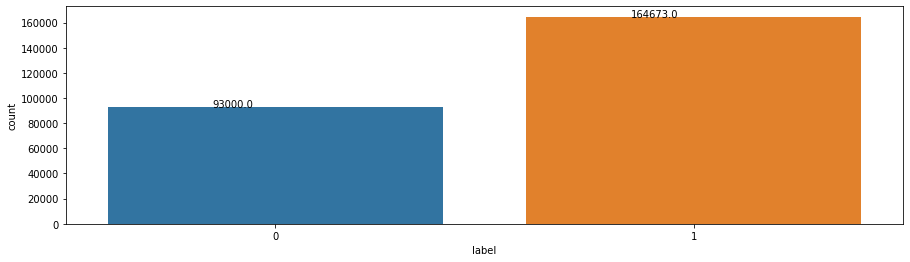

In [5]:
plt.figure(figsize=(15,4))

ax=sns.countplot(x="label",data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
#plt.title = 'sensor'
plt.show()


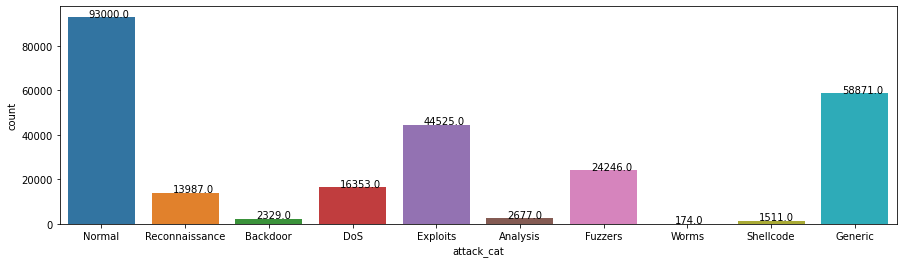

In [6]:
plt.figure(figsize=(15,4))

ax=sns.countplot(x="attack_cat",data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
#plt.title = 'sensor'
plt.show()


In [31]:

n_sample=2576

data=df.sort_values(by="label")
data.index=pd.Series(range(257673))

cls1=data[0:93000]
cls2=data[93000:257673]
cls2=shuffle(cls2)
cls2=cls2[0:n_sample]
imbalanced_unsw=pd.concat([cls1,cls2],axis=0)

In [33]:
imbalanced_unsw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95576 entries, 0 to 140122
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                95576 non-null  float64
 1   proto              95576 non-null  object 
 2   service            95576 non-null  object 
 3   state              95576 non-null  object 
 4   spkts              95576 non-null  int64  
 5   dpkts              95576 non-null  int64  
 6   sbytes             95576 non-null  int64  
 7   dbytes             95576 non-null  int64  
 8   rate               95576 non-null  float64
 9   sttl               95576 non-null  int64  
 10  dttl               95576 non-null  int64  
 11  sload              95576 non-null  float64
 12  dload              95576 non-null  float64
 13  sloss              95576 non-null  int64  
 14  dloss              95576 non-null  int64  
 15  sinpkt             95576 non-null  float64
 16  dinpkt             95

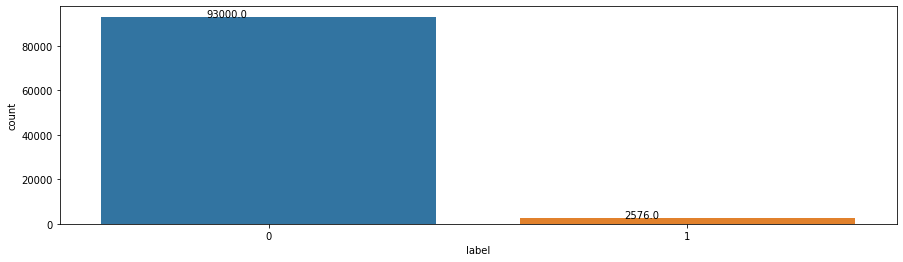

In [9]:
plt.figure(figsize=(15,4))

ax=sns.countplot(x="label",data=imbalanced_unsw)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

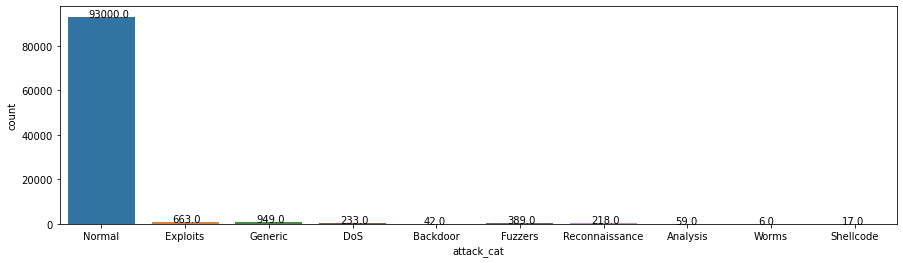

In [10]:
plt.figure(figsize=(15,4))

ax=sns.countplot(x="attack_cat",data=imbalanced_unsw)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
#plt.title = 'sensor'
plt.show()

In [32]:
#list_drop = ['id','label','attack_cat']
list_drop = ['id','attack_cat']
imbalanced_unsw.drop(list_drop,axis=1,inplace=True)

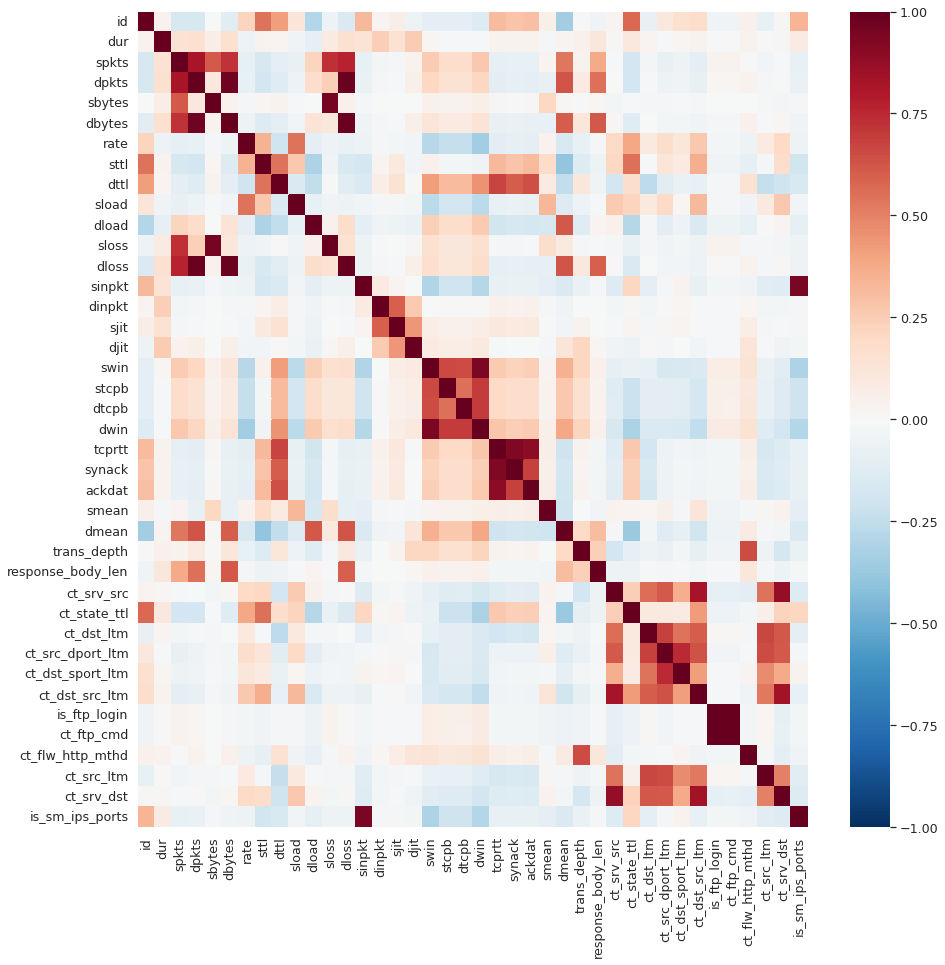

In [14]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,15))
sns.heatmap(
    imbalanced_unsw.corr(),        
    cmap='RdBu_r', 
    #annot=True, 
    vmin=-1, vmax=1);

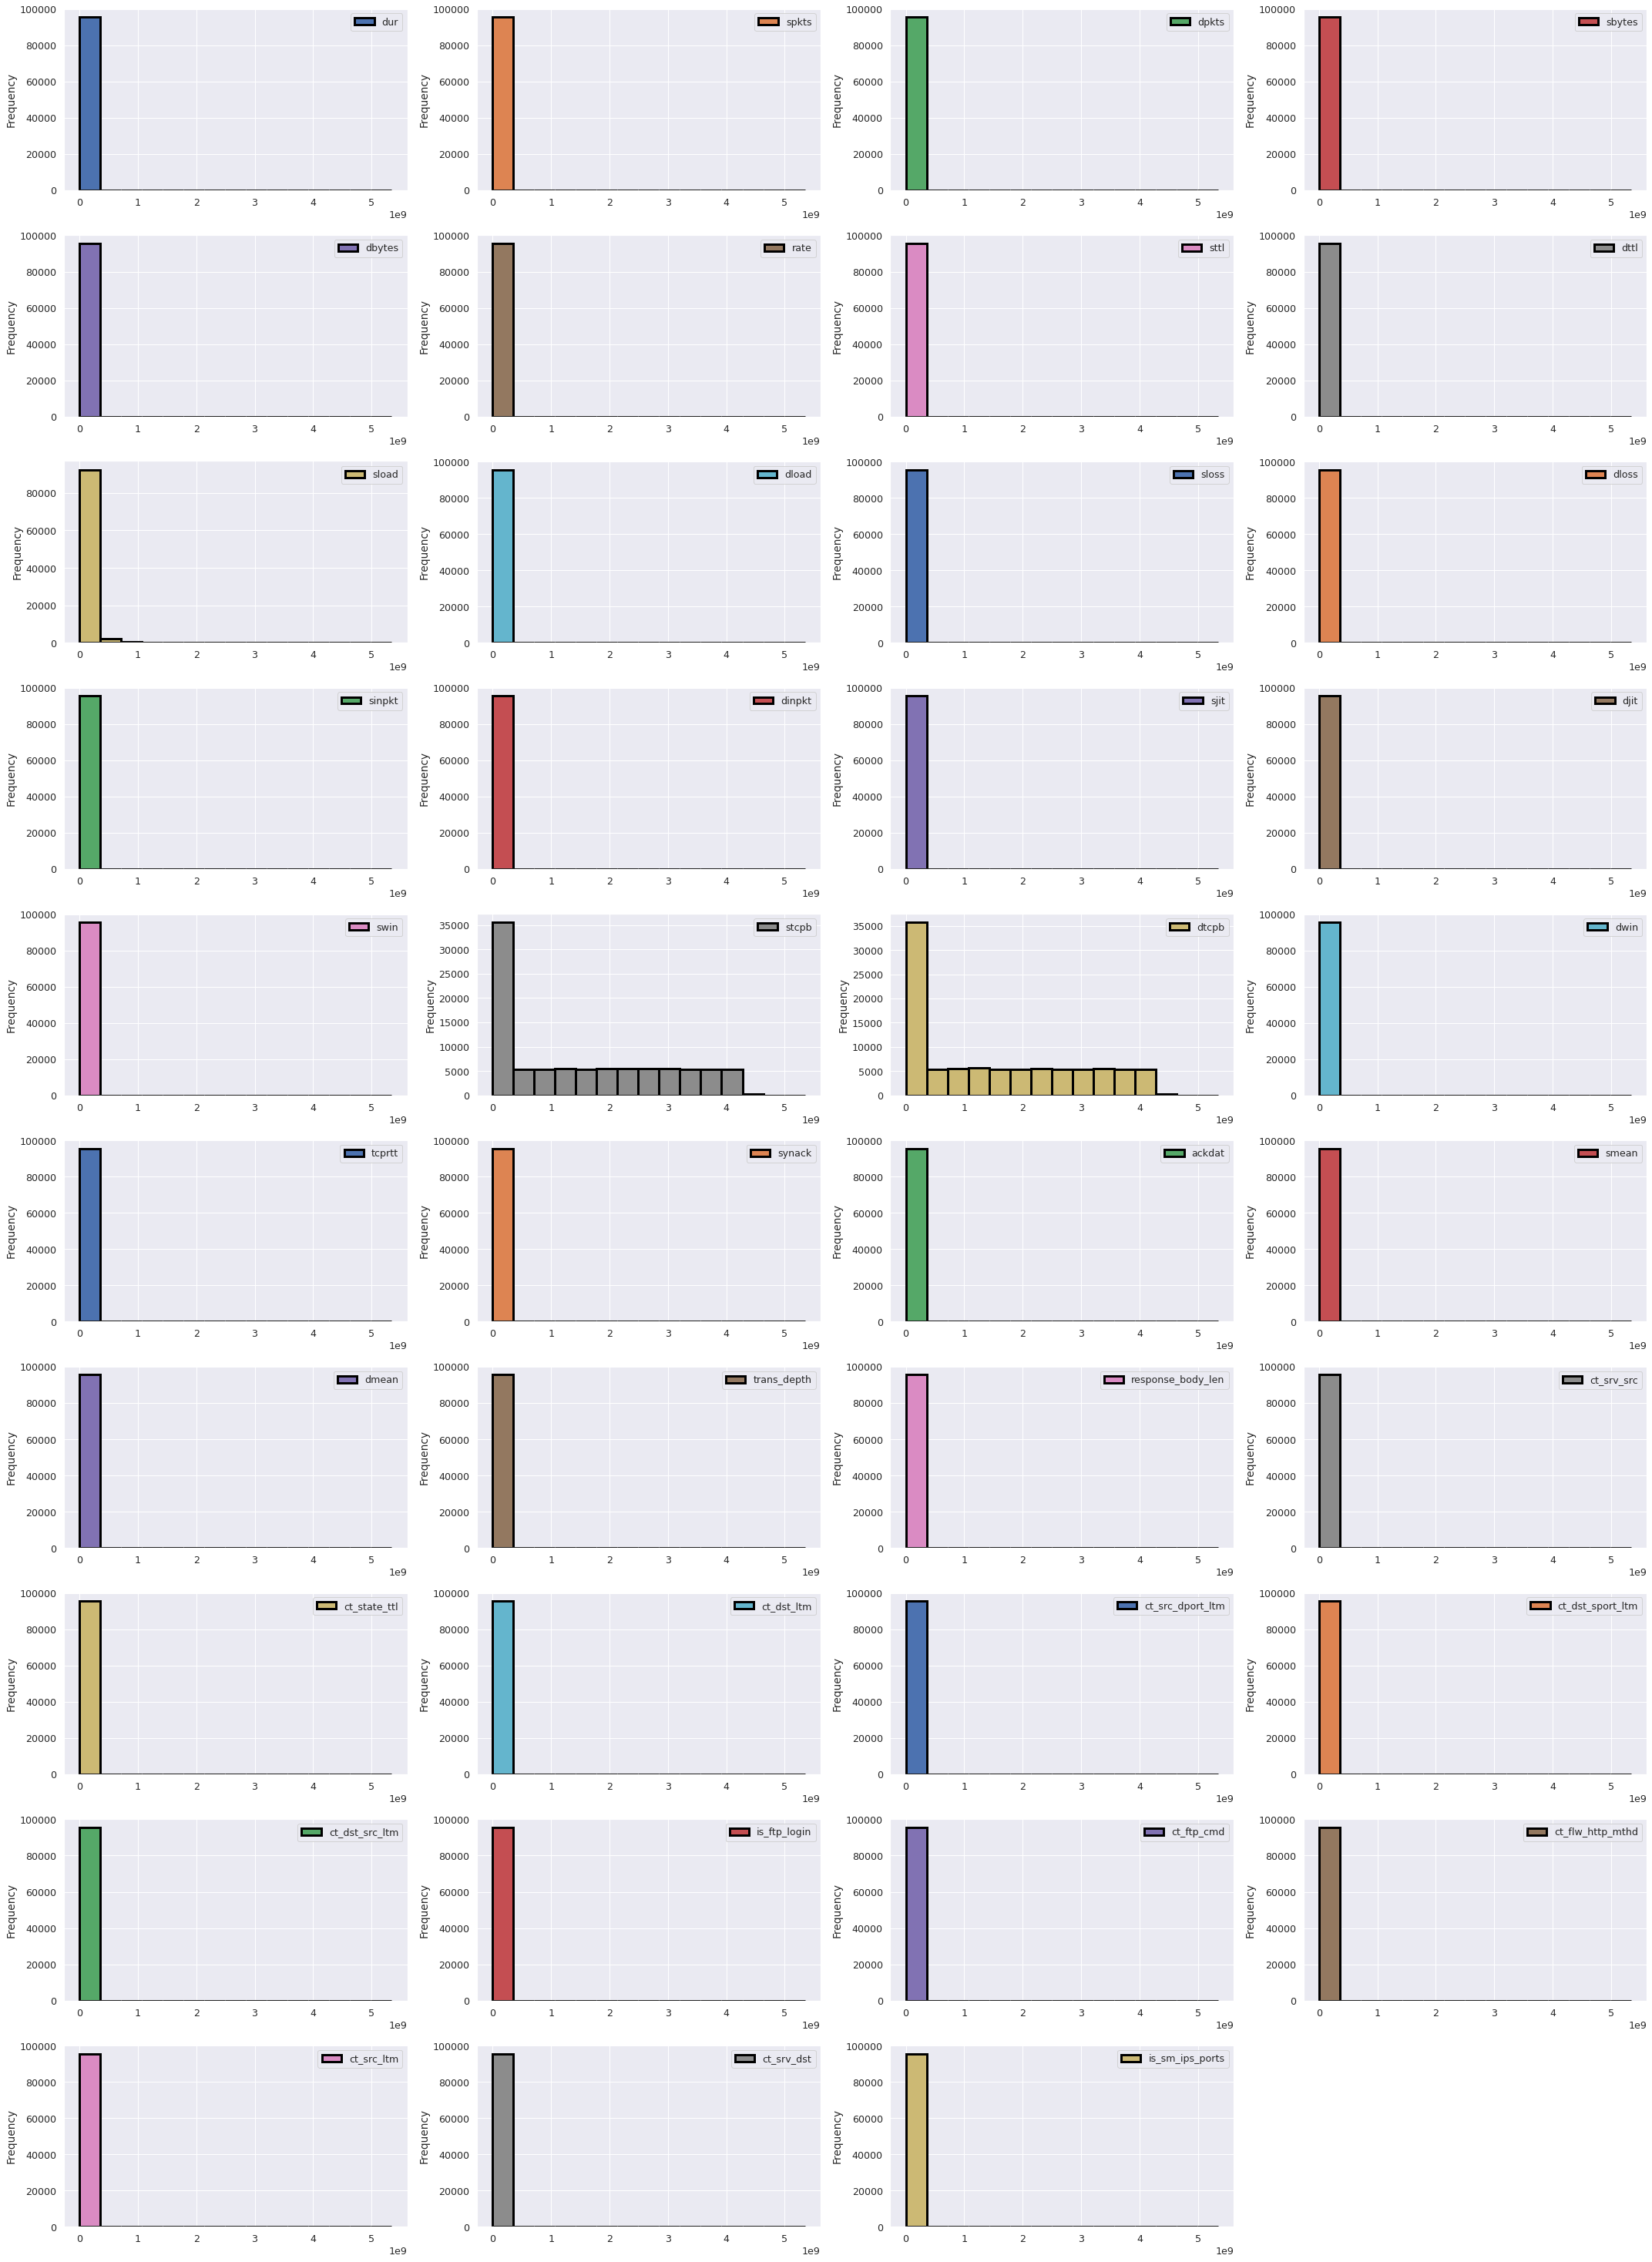

In [25]:
imbalanced_unsw.plot.hist(subplots=True, bins=15,layout=(10, 4), figsize=(30, 41), sharex=False, edgecolor='black', linewidth=3.0);
plt.tight_layout(rect=(0, 0, 1, 1))  

In [27]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95576 entries, 0 to 249723
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                95576 non-null  float64
 1   spkts              95576 non-null  int64  
 2   dpkts              95576 non-null  int64  
 3   sbytes             95576 non-null  int64  
 4   dbytes             95576 non-null  int64  
 5   rate               95576 non-null  float64
 6   sttl               95576 non-null  int64  
 7   dttl               95576 non-null  int64  
 8   sload              95576 non-null  float64
 9   dload              95576 non-null  float64
 10  sloss              95576 non-null  int64  
 11  dloss              95576 non-null  int64  
 12  sinpkt             95576 non-null  float64
 13  dinpkt             95576 non-null  float64
 14  sjit               95576 non-null  float64
 15  djit               95576 non-null  float64
 16  swin               95

In [28]:
# unsupervised 
# numerical 
df_num = imbalanced_unsw.select_dtypes(include=[np.number])
pfa = PFA(n_features=20)
pfa.fit(df_num)

# To get the transformed matrix
unsw_num = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_
column_indices

[0, 29, 3, 11, 5, 17, 9, 10, 13, 14, 15, 16, 21, 23, 24, 28, 32, 33, 36, 38]

In [34]:
num_cat_unsw=imbalanced_unsw.iloc[:,[0, 32, 6, 14, 8, 20, 12, 13, 16, 17, 18, 19, 24, 26, 27, 31, 35, 36, 39, 41, 1,2,3,42]]

In [35]:
# category
num_cat_unsw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95576 entries, 0 to 140122
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dur              95576 non-null  float64
 1   ct_dst_ltm       95576 non-null  int64  
 2   sbytes           95576 non-null  int64  
 3   dloss            95576 non-null  int64  
 4   rate             95576 non-null  float64
 5   stcpb            95576 non-null  int64  
 6   dload            95576 non-null  float64
 7   sloss            95576 non-null  int64  
 8   dinpkt           95576 non-null  float64
 9   sjit             95576 non-null  float64
 10  djit             95576 non-null  float64
 11  swin             95576 non-null  int64  
 12  synack           95576 non-null  float64
 13  smean            95576 non-null  int64  
 14  dmean            95576 non-null  int64  
 15  ct_state_ttl     95576 non-null  int64  
 16  ct_dst_src_ltm   95576 non-null  int64  
 17  is_ftp_logi

In [36]:
features_to_encode = ['proto', 'service', 'state']
for feature in features_to_encode:
    num_cat_unsw = encode_and_bind(num_cat_unsw, feature)

In [38]:
num_cat_unsw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95576 entries, 0 to 140122
Columns: 162 entries, dur to state_no
dtypes: float64(7), int64(14), uint8(141)
memory usage: 28.9 MB


In [39]:
downsized_unsw=num_cat_unsw[45576:95576]
downsized_unsw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 45576 to 140122
Columns: 162 entries, dur to state_no
dtypes: float64(7), int64(14), uint8(141)
memory usage: 15.1 MB


In [42]:
kv = {0: 0, 1: 1}
downsized_unsw["attack"]=downsized_unsw["label"].map(lambda x: kv[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


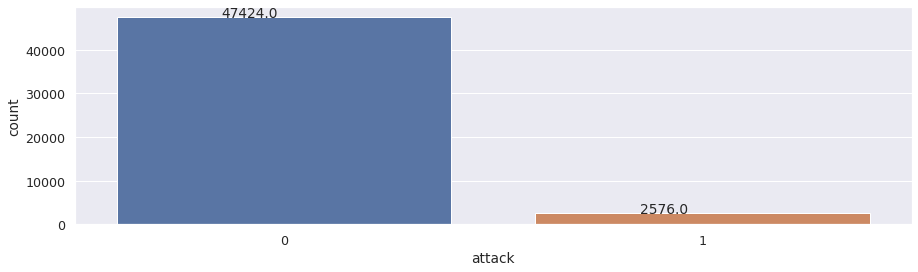

In [43]:
plt.figure(figsize=(15,4))

ax=sns.countplot(x="attack",data=downsized_unsw)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [45]:
list_drop = ['label']
downsized_unsw.drop(list_drop,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
downsized_unsw.to_csv('../content/drive/MyDrive/data/UNSW_downsized.csv', index=False)

5. paysim

Unsupervised Feature selection

Categorical attribute processing

Down_sizing

In [47]:
paysim_org = pd.read_csv("../content/drive/MyDrive/data/2_paysim_mmt_all.csv")

In [48]:
paysim_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [50]:
paysim_org['errorBalanceOrig'] = paysim_org['newbalanceOrig'] + paysim_org['amount'] - paysim_org['oldbalanceOrg']
paysim_org['errorBalanceDest'] = paysim_org['oldbalanceDest'] + paysim_org['amount'] - paysim_org['newbalanceDest']

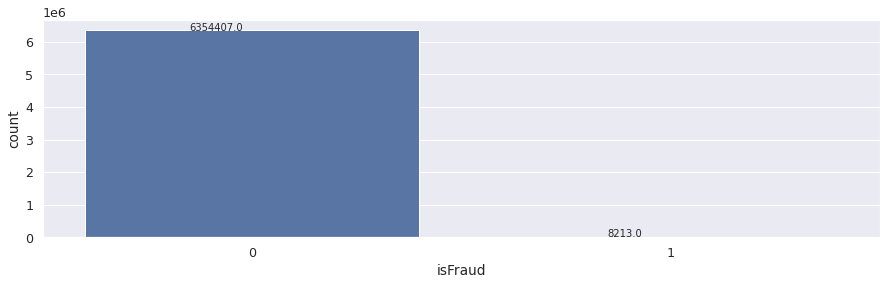

In [51]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,4))

ax=sns.countplot(x="isFraud",data=paysim_org)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

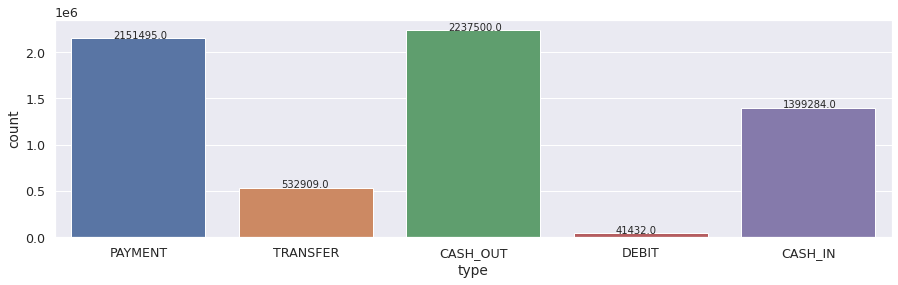

In [52]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,4))

ax=sns.countplot(x="type",data=paysim_org)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Text(0.5, 1.0, 'paysim hourly amount visualization')

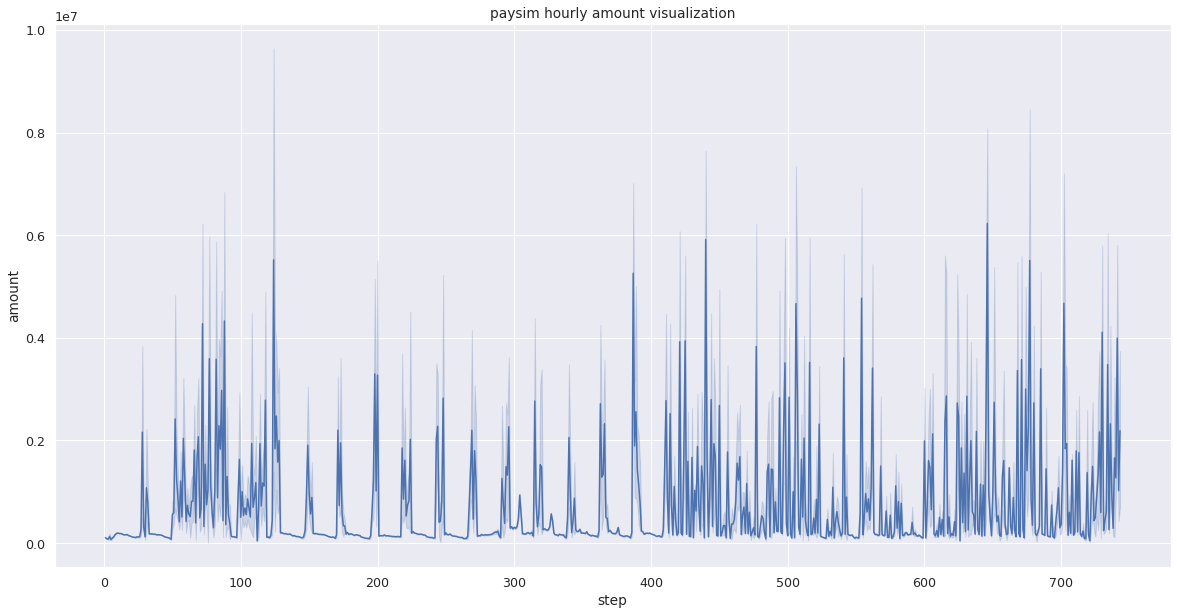

In [53]:
rcParams['figure.figsize']=20,10
sns.lineplot(x="step", y="amount",
             data=paysim_org)
plt.title('paysim hourly amount visualization')

Text(0.5, 1.0, 'paysim hourly error original amount visualization')

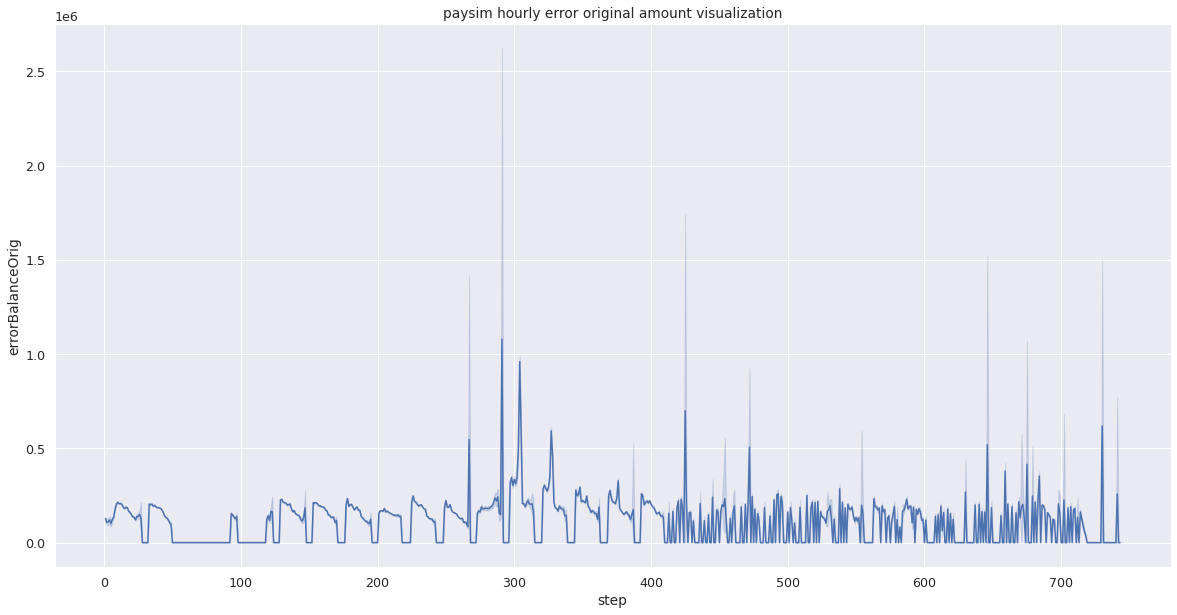

In [54]:
rcParams['figure.figsize']=20,10
sns.lineplot(x="step", y="errorBalanceOrig",
             data=paysim_org)
plt.title('paysim hourly error original amount visualization')

Text(0.5, 1.0, 'paysim hourly error destination amount visualization')

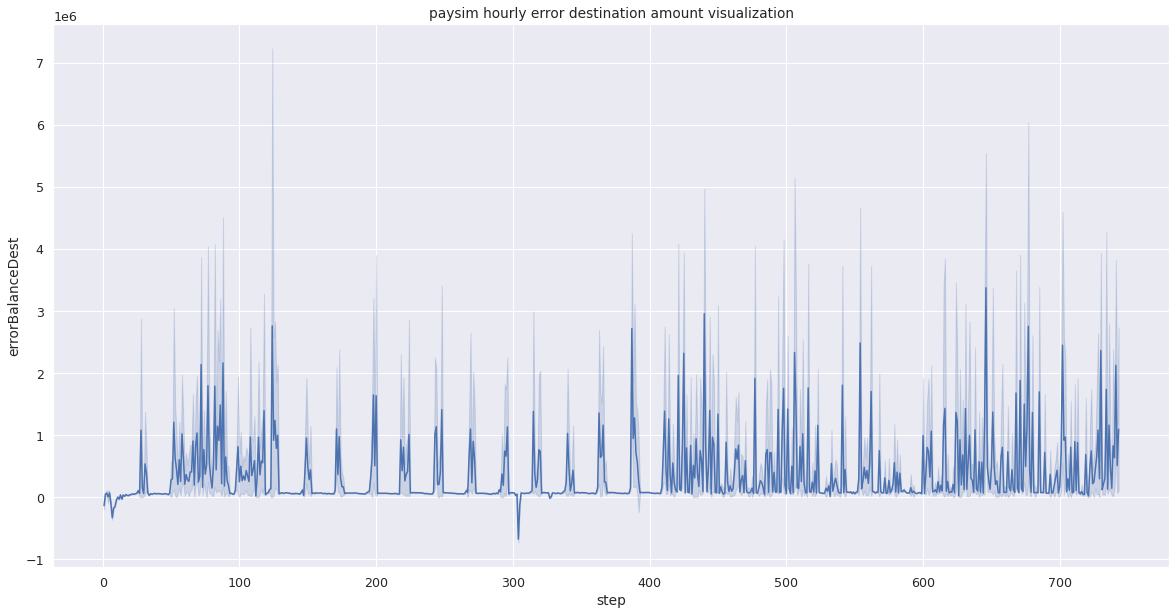

In [55]:
rcParams['figure.figsize']=20,10
sns.lineplot(x="step", y="errorBalanceDest",
             data=paysim_org)
plt.title('paysim hourly error destination amount visualization')

<Figure size 1440x2160 with 0 Axes>

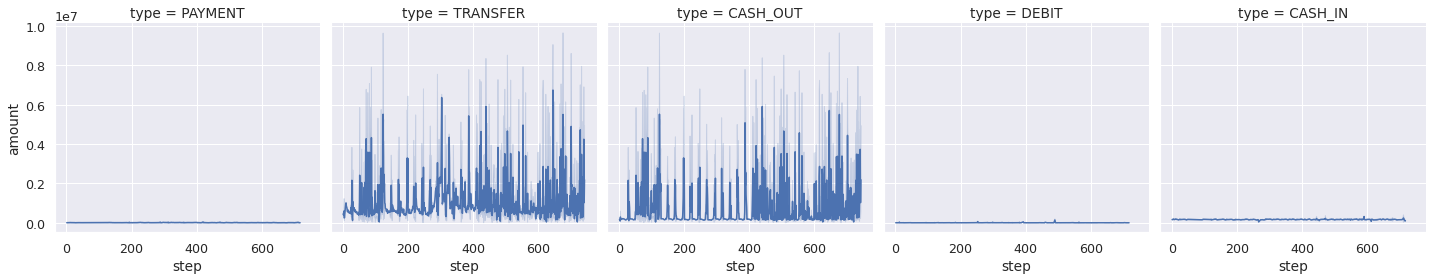

In [56]:
plt.figure(figsize=(20,30))
sns.relplot(
    x="step", 
    y="amount", 
    data=paysim_org,
    palette='bright', 
    height=4,
    kind='line', 
    col='type');

In [57]:
# category
features_to_encode = ['type']
for feature in features_to_encode:
    paysim_org = encode_and_bind(paysim_org, feature)

In [58]:
paysim_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   amount            float64
 2   nameOrig          object 
 3   oldbalanceOrg     float64
 4   newbalanceOrig    float64
 5   nameDest          object 
 6   oldbalanceDest    float64
 7   newbalanceDest    float64
 8   isFraud           int64  
 9   errorBalanceOrig  float64
 10  errorBalanceDest  float64
 11  type_CASH_IN      uint8  
 12  type_CASH_OUT     uint8  
 13  type_DEBIT        uint8  
 14  type_PAYMENT      uint8  
 15  type_TRANSFER     uint8  
dtypes: float64(7), int64(2), object(2), uint8(5)
memory usage: 564.3+ MB


In [59]:
kv = {0: 0, 1: 1}
paysim_org["label"]=paysim_org["isFraud"].map(lambda x: kv[x])
list_drop = ['isFraud']
paysim_org.drop(list_drop,axis=1,inplace=True)

In [61]:
list_drop = ['nameOrig','nameDest']
paysim_org.drop(list_drop,axis=1,inplace=True)

In [62]:
paysim_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   amount            float64
 2   oldbalanceOrg     float64
 3   newbalanceOrig    float64
 4   oldbalanceDest    float64
 5   newbalanceDest    float64
 6   errorBalanceOrig  float64
 7   errorBalanceDest  float64
 8   type_CASH_IN      uint8  
 9   type_CASH_OUT     uint8  
 10  type_DEBIT        uint8  
 11  type_PAYMENT      uint8  
 12  type_TRANSFER     uint8  
 13  label             int64  
dtypes: float64(7), int64(2), uint8(5)
memory usage: 467.2 MB


In [63]:
paysim_org[paysim_org['step']==430]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,label
6006719,430,221511.12,221511.12,0.0,0.00,0.00,0.0,2.215111e+05,0,0,0,0,1,1
6006720,430,221511.12,221511.12,0.0,201354.78,422865.90,0.0,0.000000e+00,0,1,0,0,0,1
6006721,430,326394.80,326394.80,0.0,0.00,0.00,0.0,3.263948e+05,0,0,0,0,1,1
6006722,430,326394.80,326394.80,0.0,16973.41,343368.22,0.0,-1.000000e-02,0,1,0,0,0,1
6006723,430,3302492.95,3302492.95,0.0,0.00,0.00,0.0,3.302493e+06,0,0,0,0,1,1
6006724,430,3302492.95,3302492.95,0.0,589810.81,3892303.76,0.0,4.656613e-10,0,1,0,0,0,1
6006725,430,2828068.73,2828068.73,0.0,0.00,0.00,0.0,2.828069e+06,0,0,0,0,1,1
6006726,430,2828068.73,2828068.73,0.0,102766.80,2930835.53,0.0,0.000000e+00,0,1,0,0,0,1


In [69]:
paysim_org[paysim_org['step']==500]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,label
6055699,500,163689.47,32453.0,0.00,478209.94,641899.41,131236.47,0.000000e+00,0,1,0,0,0,0
6055700,500,14890.85,11417.0,0.00,0.00,0.00,3473.85,1.489085e+04,0,0,0,1,0,0
6055701,500,1106.62,100629.0,99522.38,110979.12,112085.74,0.00,-1.455192e-11,0,1,0,0,0,0
6055702,500,8655.49,1666.0,0.00,0.00,0.00,6989.49,8.655490e+03,0,0,0,1,0,0
6055703,500,30575.96,1114.0,0.00,0.00,30575.96,29461.96,0.000000e+00,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6061802,500,1169.58,0.0,0.00,0.00,0.00,1169.58,1.169580e+03,0,0,0,1,0,0
6061803,500,109732.26,28466.0,0.00,2292127.32,2401859.59,81266.26,-1.000000e-02,0,1,0,0,0,0
6061804,500,87268.61,107324.0,20055.39,0.00,87268.61,0.00,0.000000e+00,0,1,0,0,0,0
6061805,500,83108.21,58935.0,142043.21,98985.08,15876.87,166216.42,1.662164e+05,1,0,0,0,0,0


In [66]:
# based on graph frequency of the error amount in original and destination; pick step 430 to step 500
downsized_paysim=paysim_org[6006719:6061806]
downsized_paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55087 entries, 6006719 to 6061805
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   step              55087 non-null  int64  
 1   amount            55087 non-null  float64
 2   oldbalanceOrg     55087 non-null  float64
 3   newbalanceOrig    55087 non-null  float64
 4   oldbalanceDest    55087 non-null  float64
 5   newbalanceDest    55087 non-null  float64
 6   errorBalanceOrig  55087 non-null  float64
 7   errorBalanceDest  55087 non-null  float64
 8   type_CASH_IN      55087 non-null  uint8  
 9   type_CASH_OUT     55087 non-null  uint8  
 10  type_DEBIT        55087 non-null  uint8  
 11  type_PAYMENT      55087 non-null  uint8  
 12  type_TRANSFER     55087 non-null  uint8  
 13  label             55087 non-null  int64  
dtypes: float64(7), int64(2), uint8(5)
memory usage: 4.0 MB


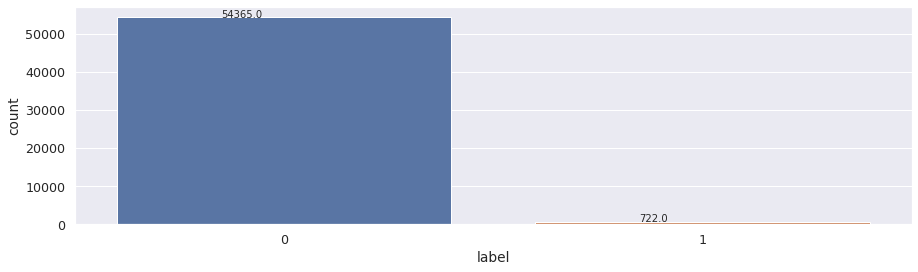

In [68]:
# anomaly % 1.3
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,4))

ax=sns.countplot(x="label",data=downsized_paysim)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [70]:
downsized_paysim.to_csv('../content/drive/MyDrive/data/paysim_downsized.csv', index=False)